# Домашнее задание к семинару 02 (HW02)

1. В публичном репозитории студента присутствует папка `homeworks/HW02/` с файлом `HW02.ipynb`.
2. Ноутбук `HW02.ipynb` содержит:
   - корректную загрузку учебного датасета в `pandas.DataFrame`;
   - базовый первичный осмотр (`head`, `info`, `describe` или аналог);
   - анализ пропусков и дубликатов;
   - минимум два примера проверки качества данных (диапазоны, логические противоречия и т.п.);
   - минимум одну осмысленную группировку с агрегатами (через `groupby` или аналог);
   - минимум три графика: histogram, boxplot и scatter plot (можно больше).
3. Хотя бы один график сохранён в файл в структуре репозитория (например, в `homeworks/HW02/figures/`), и этот файл присутствует в Git.
4. Код выполняется без ошибок при последовательном запуске всех ячеек ноутбука.

Дополнительно поощряется (но не обязательно для зачёта):

- аккуратные и понятные подписи осей, легенд и заголовков;
- наличие кратких текстовых комментариев и выводов по результатам EDA;
- осмысленные проверки качества данных, привязанные к предметной области датасета;


**Импорт библиотек**

In [80]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt # импорт библиотек

**Загрузка данных**

In [7]:
data_path = r"C:\Users\Mechrevo\Desktop\homeworks\HW02\S02-hw-dataset.csv"
df = pd.read_csv(data_path) # загрузка данных

display(df) # вывод данных
print(df.info()) # информация о датасете
print(df.describe()) # описательная статистика

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000   24.000000   3.000000   432.000000
50%    20.000000   33.000000   5.000000   693.000000
75%    30.000000   45.500000   7.000000  1115.000000
max    40.000000  120.000000  11.000000  2475.000000


**Вывод кол-ва пропусков**

In [13]:
missing_data = df.isnull().sum() # Вывод количества пропусков и их долю
missing_percent = (missing_data / len(data)) * 100
missing_info = pd.DataFrame({
    'Количество пропусков': missing_data,
    'Процент пропусков': missing_percent
})
display(missing_info[missing_info['Количество пропусков'] > 0])

,Количество пропусков,Процент пропусков
age,2,4.878049


**Вывод дубликатов**

In [26]:
duplicated_users = df[df.duplicated()]
display(duplicated_users)

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


**Анализ подозрительных значений**

In [48]:
# 1. Анализ возраста
print(f"Минимальный возраст: {df['age'].min()}")
print(f"Максимальный возраст: {df['age'].max()}")
print(f"Средний возраст: {df['age'].mean().round(1)}")

Минимальный возраст: 5.0
Максимальный возраст: 120.0
Средний возраст: 36.5


In [49]:
# 2. Анализ покупок
print(f"Минимальное количество покупок: {df['purchases'].min()}")
print(f"Максимальное количество покупок: {df['purchases'].max()}")
print(f"Среднее количество покупок: {df['purchases'].mean().round(1)}")

Минимальное количество покупок: -1
Максимальное количество покупок: 11
Среднее количество покупок: 4.8


In [47]:
# 3. Анализ выручки
print(f"Минимальная выручка: {df['revenue'].min()}")
print(f"Максимальная выручка: {df['revenue'].max()}")
print(f"Средняя выручка: {df['revenue'].mean().round(1)}")

Минимальная выручка: 0
Максимальная выручка: 2475
Средняя выручка: 820.0


In [45]:
# 4. Логические противоречия
# Пользователи с покупками, но нулевой выручкой
contradiction1 = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
print(f"Пользователи с покупками >0 и выручкой = 0: {len(contradiction1)}")

# Пользователи с выручкой, но без покупок
contradiction2 = df[(df['purchases'] == 0) & (df['revenue'] > 0)]
print(f"Пользователи с покупками =0 и выручкой >0: {len(contradiction2)}")

Пользователи с покупками >0 и выручкой = 0: 1
Пользователи с покупками =0 и выручкой >0: 0


**Обнаруженные проблемы качества данных:**

1. **Пропуски в данных**: В столбце `age` присутствуют 2 пропущенных значения (4.88% от всех данных).

2. **Дубликаты**: Обнаружен один полный дубликат строки `user_id=10`

3. **Подозрительные значения возраста**:
   - Пользователь с возрастом 120 лет - явно нереалистичное значение
   - Пользователь с возрастом 5 лет - маловероятно для совершения покупок

4. **Некорректные значения покупок**:
   - Отрицательное значение покупок (-1)

5. **Логические противоречия**:
   - 1 пользователь имеет ненулевое количество покупок при нулевой выручке
   - Отсутствуют пользователи с нулевыми покупками и ненулевой выручкой

**Частоты**

In [59]:
country_counts = df['country'].value_counts().reset_index()
display(country_counts)

,country,count
0,RU,13
1,FR,12
2,US,8
3,DE,6
4,CN,2


In [60]:
age_counts = df['age'].value_counts().reset_index()
age_counts.head(10)

,age,count
0,24.0,5
1,52.0,2
2,31.0,2
3,39.0,2
4,28.0,2
5,35.0,2
6,47.0,2
7,32.0,2
8,20.0,1
9,25.0,1


**Агрегация и статистика**

In [66]:
country_stats = df.groupby('country').agg({
    'age': ['mean', 'median', 'count'],
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum', 'count']
}).round(2)

display(country_stats)

age              purchases      revenue             
          mean median count      mean sum     mean    sum count
country                                                        
CN       24.00   24.0     2      4.50   9  1054.00   2108     2
DE       34.60   35.0     5      6.50  39  1445.50   8673     6
FR       46.25   42.0    12      4.25  51   675.92   8111    12
RU       30.08   26.0    13      4.77  62   790.08  10271    13
US       36.71   39.0     7      4.62  37   557.38   4459     8

In [74]:
age_bins = [0, 18, 25, 35, 45, 55, 100]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '55+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

age_group_counts = df['age_group'].value_counts().sort_index()
print(age_group_counts)

age_group
<18       1
18-25    10
26-35    10
36-45     7
46-55     8
55+       2
Name: count, dtype: int64


In [79]:
age_group_stats = df.groupby('age_group').agg({
    'purchases': ['mean', 'sum', 'count'],
    'revenue': ['mean', 'sum'],
    'user_id': 'count'
}).round(2)

display(age_group_stats)

C:\Users\Mechrevo\AppData\Local\Temp\ipykernel_20808\585551752.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('age_group').agg({


purchases            revenue        user_id
               mean sum count     mean    sum   count
age_group                                            
<18            8.00   8     1  1488.00   1488       1
18-25          4.70  47    10   617.10   6171      10
26-35          5.30  53    10  1009.60  10096      10
36-45          5.00  35     7  1042.86   7300       7
46-55          4.12  33     8   627.62   5021       8
55+            4.00   8     2   417.50    835       2

**Анализ агрегатов**

1. **Распределение по странам**:
   - Наибольшее количество пользователей из России (RU) - 13 человек, средний возраст покупателей 26-30лет
   - В остальных странах, кроме Канады, возраст смещен больше в сторону 40 лет

2. **Возрастное распределение**:
   - Наибольшая группа пользователей в возрасте 18-35 лет
   - Присутствуют пользователи всех возрастных групп, кроме младше 18 лет (если исключить аномалии)

3. **Экономические показатели по странам**:
   - Германия (DE) показывает наивысшие показатели по средней выручке на пользователя
   - Китай (CN) демонстрирует высокую среднюю выручку при небольшом количестве пользователей
   - Россия (RU) имеет наибольшее количество пользователей, но средние экономические показатели

4. **Возрастные закономерности**:
   - Пользователи возрастной группы 26-45 лет показывают наивысшую среднюю выручку
   - Молодые пользователи (18-25) совершают примерно столько же покупок, но с меньшим средним чеком, что схоже с поведением возрастной группы (46-55) лет

In [81]:
if not os.path.exists('figures'):
    os.makedirs('figures')

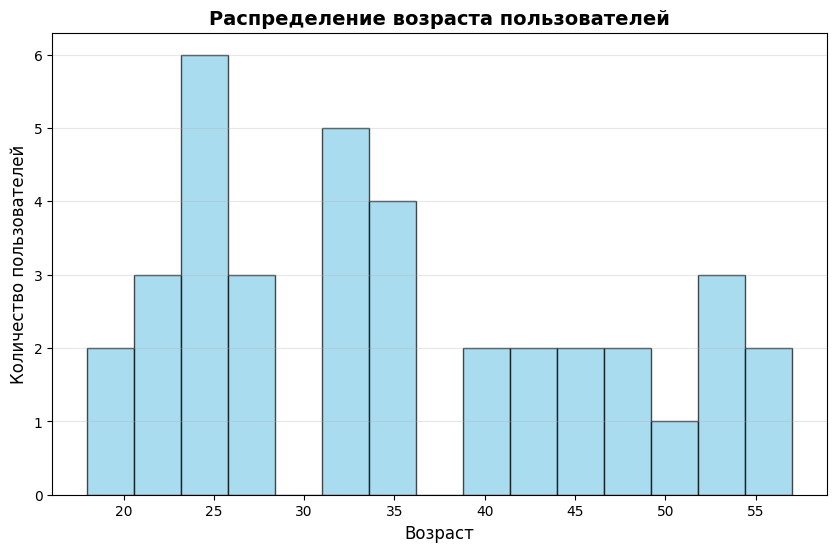

In [86]:
plt.figure(figsize=(10, 6))
age_clean = df[(df['age'] >= 18) & (df['age'] <= 80)]['age'].dropna()

plt.hist(age_clean, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Распределение возраста пользователей', fontsize=14, fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Сохраняем график
plt.savefig('figures/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Mechrevo\AppData\Local\Temp\ipykernel_20808\397606404.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=countries_to_plot['country'].unique())


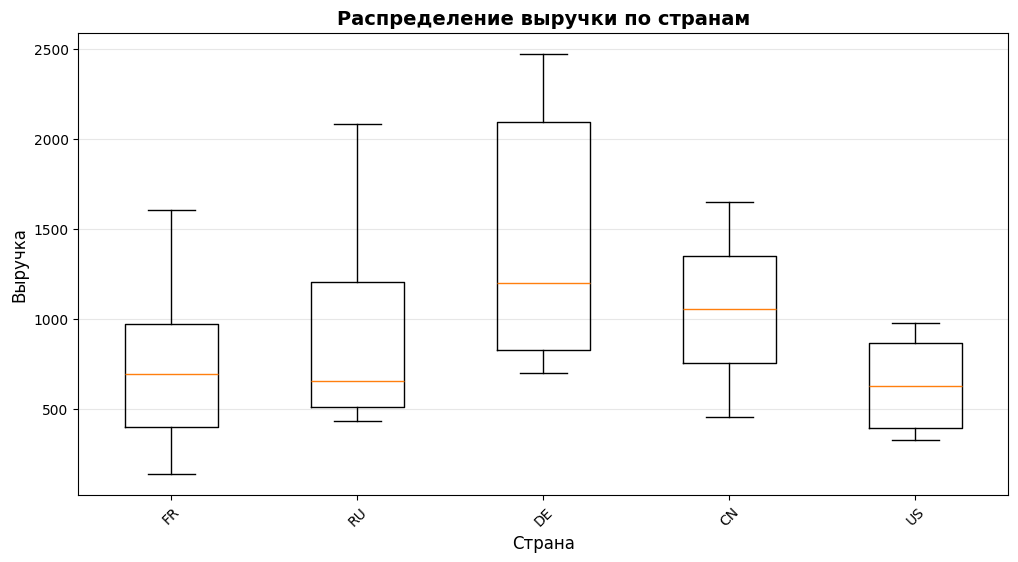

In [87]:
plt.figure(figsize=(12, 6))
countries_to_plot = df[df['revenue'] > 0]  # Исключаем нулевую выручку для лучшей визуализации

box_data = [countries_to_plot[countries_to_plot['country'] == country]['revenue'] 
            for country in countries_to_plot['country'].unique()]

plt.boxplot(box_data, labels=countries_to_plot['country'].unique())
plt.title('Распределение выручки по странам', fontsize=14, fontweight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.savefig('figures/revenue_by_country_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

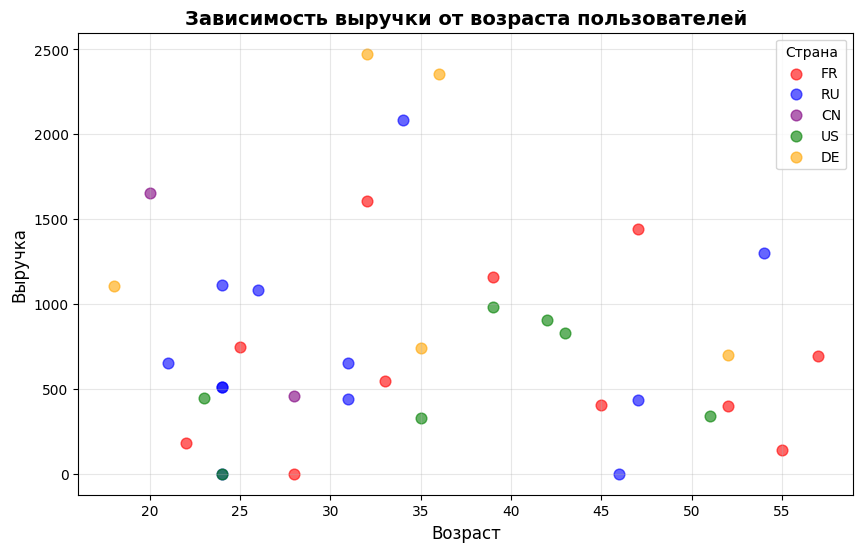

In [88]:
plt.figure(figsize=(10, 6))

# Фильтруем данные для scatter plot
scatter_data = df[(df['age'] >= 18) & (df['age'] <= 80)].dropna(subset=['age'])

# Создаем scatter plot с цветовым кодированием по странам
colors = {'FR': 'red', 'RU': 'blue', 'US': 'green', 'DE': 'orange', 'CN': 'purple'}
for country in scatter_data['country'].unique():
    country_data = scatter_data[scatter_data['country'] == country]
    plt.scatter(country_data['age'], country_data['revenue'], 
               c=colors[country], label=country, alpha=0.6, s=60)

plt.title('Зависимость выручки от возраста пользователей', fontsize=14, fontweight='bold')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Выручка', fontsize=12)
plt.legend(title='Страна')
plt.grid(alpha=0.3)

plt.savefig('figures/age_vs_revenue_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

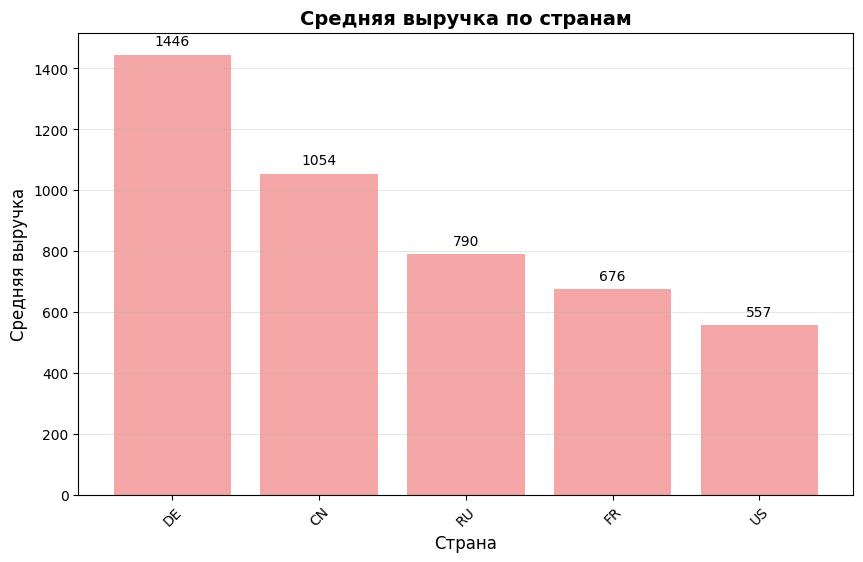

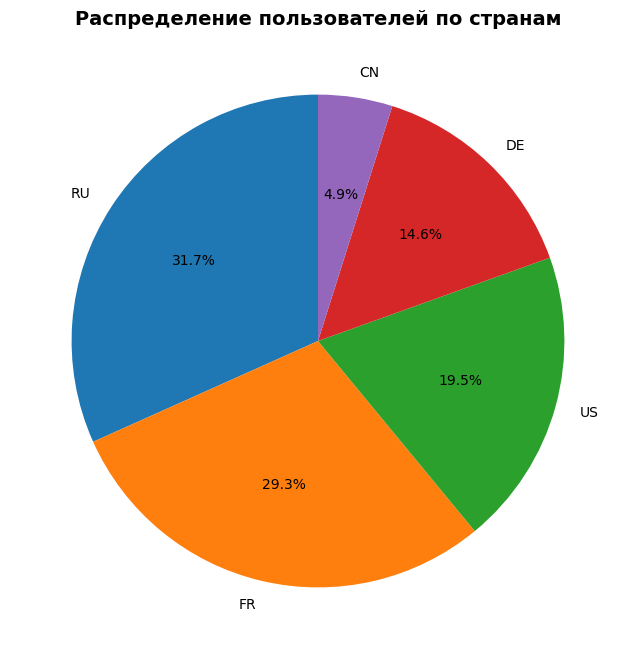

In [85]:
# Столбчатая диаграмма: средняя выручка по странам
plt.figure(figsize=(10, 6))
revenue_by_country = df.groupby('country')['revenue'].mean().sort_values(ascending=False)

plt.bar(revenue_by_country.index, revenue_by_country.values, color='lightcoral', alpha=0.7)
plt.title('Средняя выручка по странам', fontsize=14, fontweight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Средняя выручка', fontsize=12)
plt.xticks(rotation=45)

for i, v in enumerate(revenue_by_country.values):
    plt.text(i, v + 20, f'{v:.0f}', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.savefig('figures/avg_revenue_by_country.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Круговая диаграмма распределения по странам
plt.figure(figsize=(8, 8))
country_distribution = df['country'].value_counts()
plt.pie(country_distribution.values, labels=country_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение пользователей по странам', fontsize=14, fontweight='bold')
plt.savefig('figures/country_distribution_pie.png', dpi=300, bbox_inches='tight')
plt.show()